In [82]:
import os
import shap
import pydotplus
import numpy as np
import pandas as pd
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from IPython.display import Image
from sklearn.externals import joblib
np.random.seed(7)
shap.initjs()

## Read Data

In [83]:
train_feature = pd.read_csv("train_feature.csv")
test_feature = pd.read_csv("test_feature.csv")
train_label = pd.read_csv("train_label.csv")
xgb = joblib.load("GbcTry.z")

## Global Interpretation

### Tree Surrogates

In [84]:
dt = DecisionTreeRegressor(min_samples_leaf=0.05)
dt.fit(train_feature.fillna(-1), xgb.predict(train_feature))
print(mean_squared_error(xgb.predict(train_feature), dt.predict(train_feature.fillna(-1))))

0.02622409256878194


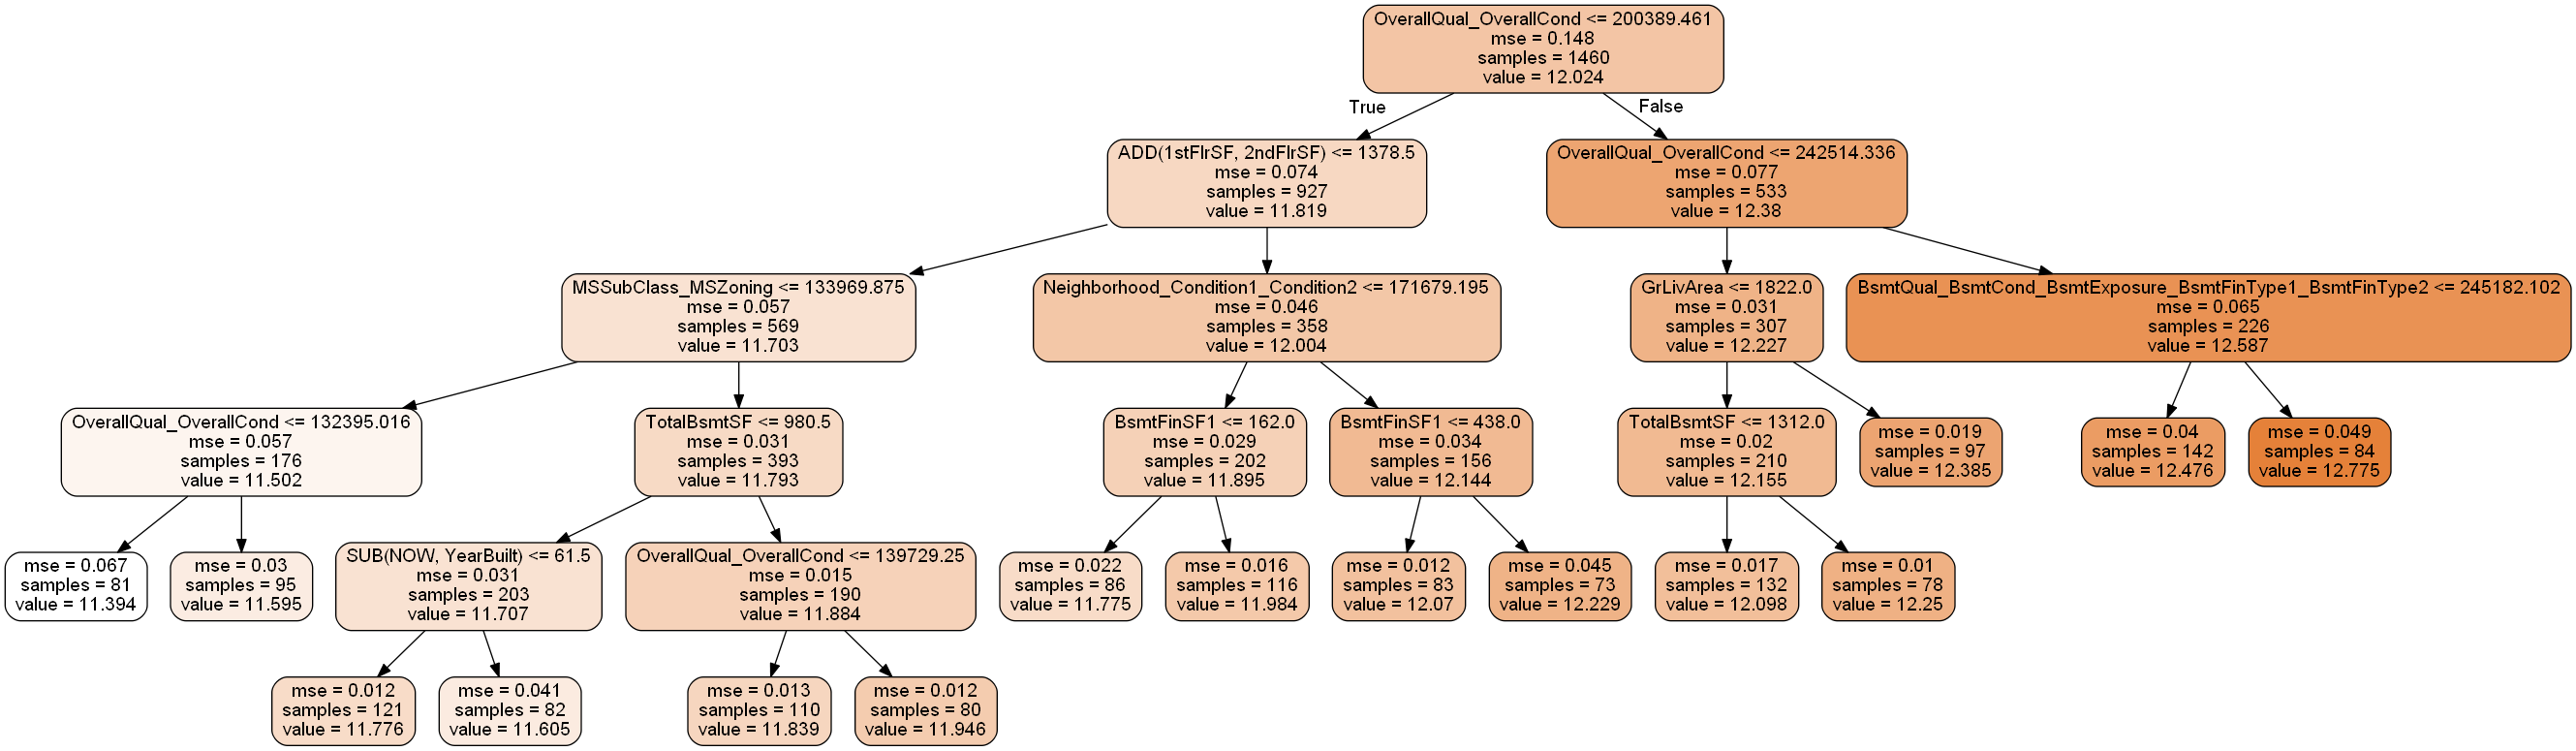

In [85]:
dot_data = export_graphviz(
    dt,
    feature_names = train_feature.columns.tolist(),
    filled = True,
    rounded = True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Feature Importance

In [86]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(train_feature)

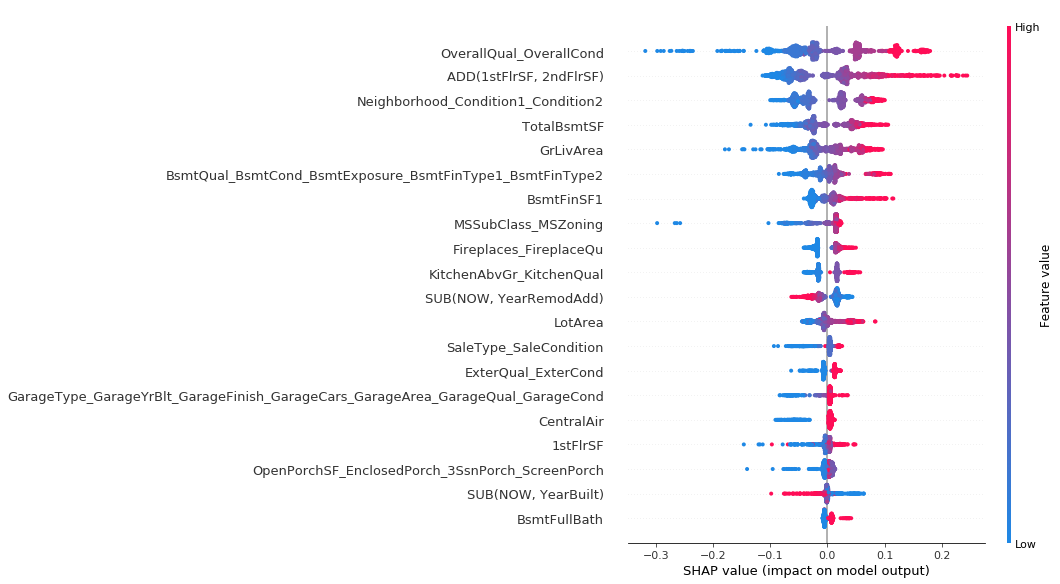

In [87]:
shap.summary_plot(shap_values, train_feature)

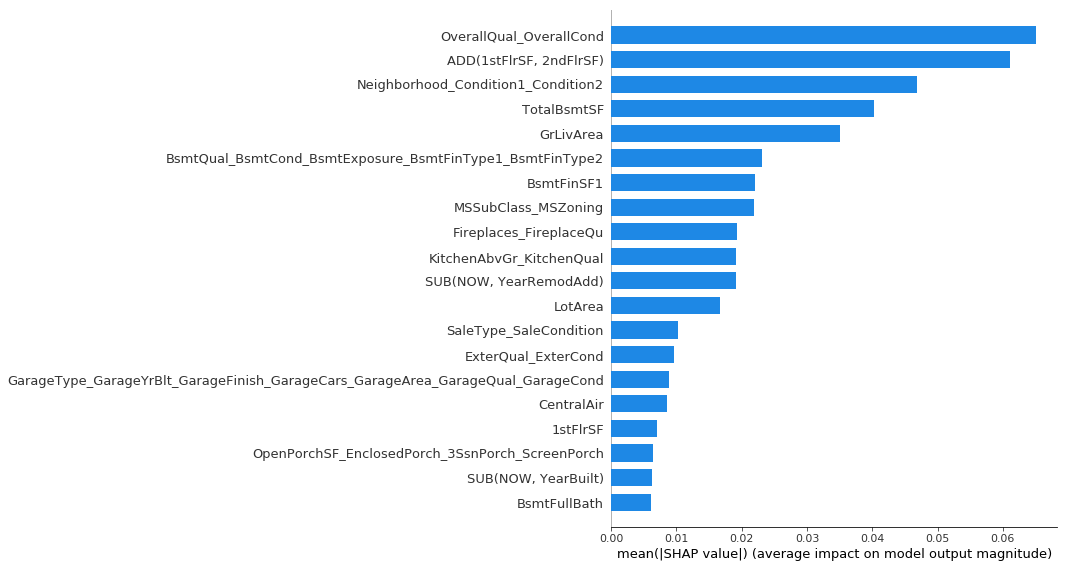

In [88]:
shap.summary_plot(shap_values, train_feature, plot_type="bar")

### Partial Dependence Plot

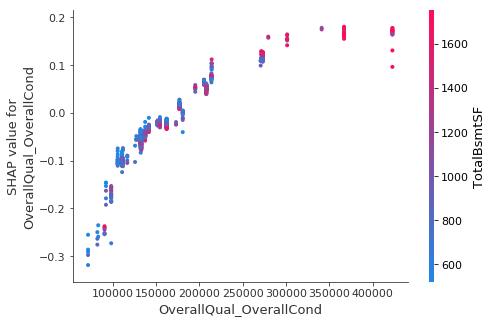

In [89]:
shap.dependence_plot("OverallQual_OverallCond", shap_values, train_feature)

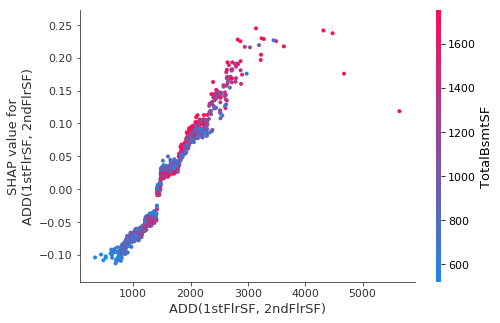

In [91]:
shap.dependence_plot("ADD(1stFlrSF, 2ndFlrSF)", shap_values, train_feature)

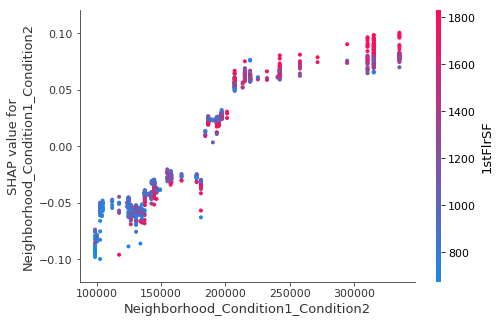

In [92]:
shap.dependence_plot("Neighborhood_Condition1_Condition2", shap_values, train_feature)

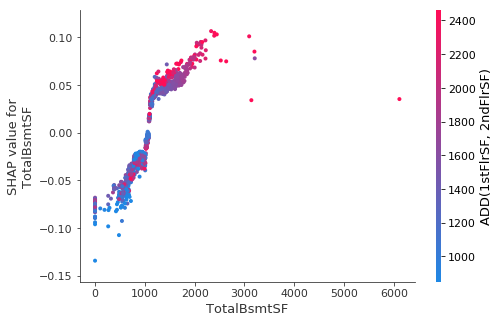

In [93]:
shap.dependence_plot("TotalBsmtSF", shap_values, train_feature)

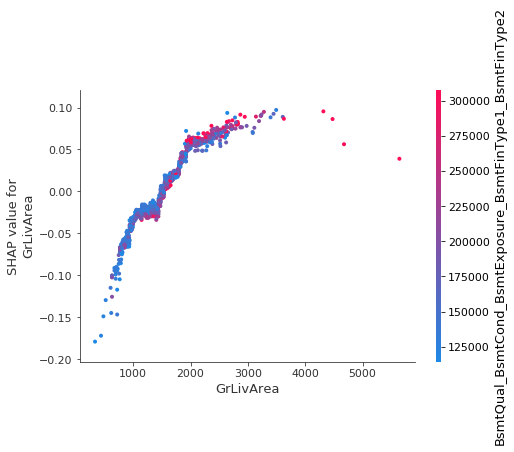

In [94]:
shap.dependence_plot("GrLivArea", shap_values, train_feature)

## Local Interpretation

In [58]:
train_label = train_label.squeeze()
train_predict = (np.expm1(xgb.predict(train_feature)) * train_feature["LotArea"]).to_frame("predict").squeeze()

### Min Top 5 // 预测偏高

In [81]:
(train_label - train_predict).sort_values().head()

train_feature.loc[:, ["LotArea", "1stFlrSF", "2ndFlrSF"]].head(10)

,LotArea,1stFlrSF,2ndFlrSF
0,8450,856,854
1,9600,1262,0
2,11250,920,866
3,9550,961,756
4,14260,1145,1053
5,14115,796,566
6,10084,1694,0
7,10382,1107,983
8,6120,1022,752
9,7420,1077,0


In [74]:
shap.force_plot(explainer.expected_value, shap_values[1324,:], train_feature.iloc[1324,:])

In [75]:
shap.force_plot(explainer.expected_value, shap_values[581,:], train_feature.iloc[581,:])

In [76]:
shap.force_plot(explainer.expected_value, shap_values[632,:], train_feature.iloc[632,:])

In [77]:
shap.force_plot(explainer.expected_value, shap_values[335,:], train_feature.iloc[335,:])

In [78]:
shap.force_plot(explainer.expected_value, shap_values[523,:], train_feature.iloc[523,:])

### Max Top 5 // 预测偏低

In [42]:
(train_label - train_predict).sort_values(ascending=False).head()

691     573952.060041
1182    535211.056232
898     477328.555275
803     465444.800600
1169    437625.741844
dtype: float64

In [59]:
shap.force_plot(explainer.expected_value, shap_values[688,:], train_feature.iloc[688,:])

In [60]:
shap.force_plot(explainer.expected_value, shap_values[1046,:], train_feature.iloc[1046,:])

In [61]:
shap.force_plot(explainer.expected_value, shap_values[803,:], train_feature.iloc[803,:])

In [62]:
shap.force_plot(explainer.expected_value, shap_values[1169,:], train_feature.iloc[1169,:])

In [63]:
shap.force_plot(explainer.expected_value, shap_values[898,:], train_feature.iloc[898,:])

### Good Predict

In [68]:
(train_label - train_predict).abs().sort_values().head()

228     22.394894
499     25.165157
417     26.066360
1374    26.502609
633     34.066105
dtype: float64

In [69]:
shap.force_plot(explainer.expected_value, shap_values[228,:], train_feature.iloc[228,:])

In [70]:
shap.force_plot(explainer.expected_value, shap_values[499,:], train_feature.iloc[499,:])

In [71]:
shap.force_plot(explainer.expected_value, shap_values[417,:], train_feature.iloc[417,:])

In [72]:
shap.force_plot(explainer.expected_value, shap_values[1374,:], train_feature.iloc[1374,:])

In [73]:
shap.force_plot(explainer.expected_value, shap_values[633,:], train_feature.iloc[633,:])

## And So On